# EDA NIF

In [1]:
import pandas as pd
import openpyxl
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

## 1. Parcelle data

In [4]:
parcelle = pd.read_excel('modified files/data_plots_geo_coords.xlsx')

In [4]:
display(parcelle.head())
print(parcelle.shape)
parcelle.columns

Unnamed: 0  PARCELLE  INVNR        LAT       LON         ALT  PRODREG  \
0           0        51    150  47.781623  8.612822  715.918970        1   
1        2403        51    250  47.781623  8.612822  715.918970        1   
2        7209        51    450  47.781623  8.612822  715.918970        1   
3        4806        51    350  47.781623  8.612822  715.918970        1   
4        2404       384    250  47.736528  8.625154  563.829759        1   

   HT_VEG       DATE    SLOPE25  ...  V_LARCH  V_ARVEN  V_UENDH     V_BUCHE  \
0       3 1984-04-10  58.407726  ...      0.0      0.0      0.0  184.359112   
1       3 1994-10-19  58.407726  ...      0.0      0.0      0.0  241.199369   
2       3 2011-11-09  58.407726  ...      0.0      0.0      0.0  347.025988   
3       3 2005-11-01  58.407726  ...      0.0      0.0      0.0  311.861351   
4       2 1995-07-10  55.683254  ...      0.0      0.0      0.0  191.500642   

   V_AHORN  V_ESCHE  V_EICHE  V_CASTA   V_UELBH   LFI  
0      0.0      0.0      0.0      0.0  0.000000  LFI1  
1      0.0      0.0      0.0      0.0  0.000000  LFI2  
2      0.0      0.0      0.0      0.0  0.000000  LFI4  
3      0.0      0.0      0.0      0.0  9.259809  LFI3  
4      0.0      0.0      0.0      0.0  0.000000  LFI2  

[5 rows x 86 columns]

(9612, 86)


Index(['Unnamed: 0', 'PARCELLE', 'INVNR', 'LAT', 'LON', 'ALT', 'PRODREG',
       'HT_VEG', 'DATE', 'SLOPE25', 'ASPECT25', 'PERF_CROI', 'QUAL_STATION',
       'UNIT_VEG_FINE', 'UNIT_VEG_GROS', 'REBOISEMENT_AN', 'SURF_TER_HA',
       'AGE_PPL', 'MODE_REGEN', 'TAILLE_PPL', 'INTENSITE_EXPLOIT',
       'TRACES_FEU', 'DEGRAD_PPL', 'DIV_STR_PPL', 'DIV_STR_PPL_CLASS', 'DDOM',
       'DEG_SUR_PER', 'LAST_INTER_DATE', 'TIGES_VIV_H', 'SDI', 'SDI_CLASSE',
       'INT_IFN2_IFN3', 'INT_IFN3-IFN4', 'NIV_DEV', 'MELANGE',
       'NEXT_INTER_DATE', 'NEXT_INTER_TYPE', 'RELIEF', 'DEG_FERMETURE',
       'STR_PPL', 'TYPE_FORET305', 'SURCHARGE', 'TYP_RAJ_PPL', 'TAUX_COUV_RAJ',
       'TAUX_COUV_RAJ_FIN', 'TAUX_COUV_RAJ_ASS', 'ESPECE_DOM', 'FEU_RES',
       'TYPE_FORET', 'EPIC_PER', 'SAPIN_PER', 'PIN_PER', 'MELEZ_PER',
       'ARO_PER', 'OTHER_CONIF_PER', 'HETR_PER', 'ERAB_PER', 'FREN_PER',
       'CHEN_PER', 'DGANTCA', 'OTHER_FEUILL_PER', 'CONIF_PER_STD',
       'ARBUST_PER', 'FEUILL_PER', 'CONIF_PER', 'PROC

In [5]:
print("Basics statistics: ")
display(parcelle.describe(include='all'))

print("Percentage of missing values: ")
display(100*parcelle.isnull().sum()/parcelle.shape[0])


Basics statistics: 


C:\Users\bloom\AppData\Local\Temp/ipykernel_10736/1686401587.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(parcelle.describe(include='all'))


Unnamed: 0       PARCELLE        INVNR          LAT          LON  \
count   9612.000000    9612.000000  9612.000000  9612.000000  9612.000000   
unique          NaN            NaN          NaN          NaN          NaN   
top             NaN            NaN          NaN          NaN          NaN   
freq            NaN            NaN          NaN          NaN          NaN   
first           NaN            NaN          NaN          NaN          NaN   
last            NaN            NaN          NaN          NaN          NaN   
mean    4805.500000   98928.478568   300.000000    46.647129     8.373582   
std     2774.889728   46104.772059   111.809215     0.402619     0.954026   
min        0.000000      51.000000   150.000000    45.860080     6.241239   
25%     2402.750000   59317.000000   225.000000    46.294223     7.490960   
50%     4805.500000  101801.000000   300.000000    46.636137     8.559447   
75%     7208.250000  143115.000000   375.000000    46.950982     9.097864   
max     9611.000000  165065.000000   450.000000    47.781623    10.486224   

                ALT      PRODREG       HT_VEG                 DATE  \
count   9612.000000  9612.000000  9612.000000                 9612   
unique          NaN          NaN          NaN                 2349   
top             NaN          NaN          NaN  1995-06-20 00:00:00   
freq            NaN          NaN          NaN                   19   
first           NaN          NaN          NaN  1983-03-15 00:00:00   
last            NaN          NaN          NaN  2017-11-03 00:00:00   
mean    1239.465745     3.672077     3.835622                  NaN   
std      412.388186     1.099672     1.154413                  NaN   
min      331.652193     1.000000     2.000000                  NaN   
25%      920.655711     3.000000     3.000000                  NaN   
50%     1220.787061     4.000000     4.000000                  NaN   
75%     1544.306069     4.000000     5.000000                  NaN   
max     2270.251469     5.000000     6.000000                  NaN   

            SLOPE25  ...      V_LARCH      V_ARVEN      V_UENDH      V_BUCHE  \
count   9612.000000  ...  9449.000000  9449.000000  9449.000000  9449.000000   
unique          NaN  ...          NaN          NaN          NaN          NaN   
top             NaN  ...          NaN          NaN          NaN          NaN   
freq            NaN  ...          NaN          NaN          NaN          NaN   
first           NaN  ...          NaN          NaN          NaN          NaN   
last            NaN  ...          NaN          NaN          NaN          NaN   
mean      59.484392  ...    28.301673     2.536589     0.400941    54.702979   
std       22.805324  ...    81.413670    18.299404     6.737838   120.521178   
min        0.559998  ...     0.000000     0.000000     0.000000     0.000000   
25%       43.593285  ...     0.000000     0.000000     0.000000     0.000000   
50%       59.059986  ...     0.000000     0.000000     0.000000     0.000000   
75%       73.009102  ...     0.000000     0.000000     0.000000    53.586810   
max      175.443161  ...  1468.643008   299.828060   378.779140  2531.852668   

            V_AHORN      V_ESCHE      V_EICHE      V_CASTA      V_UELBH   LFI  
count   9449.000000  9449.000000  9449.000000  9449.000000  9449.000000  9612  
unique          NaN          NaN          NaN          NaN          NaN     4  
top             NaN          NaN          NaN          NaN          NaN  LFI1  
freq            NaN          NaN          NaN          NaN          NaN  2403  
first           NaN          NaN          NaN          NaN          NaN   NaN  
last            NaN          NaN          NaN          NaN          NaN   NaN  
mean       9.177937     8.636591     2.782231     7.901297    11.157875   NaN  
std       28.438937    35.339167    17.151467    42.815613    32.191319   NaN  
min        0.000000     0.000000     0.000000     0.000000     0.000000   NaN  
25%        0.000000     0.00

Percentage of missing values: 


Unnamed: 0    0.000000
PARCELLE      0.000000
INVNR         0.000000
LAT           0.000000
LON           0.000000
                ...   
V_ESCHE       1.695797
V_EICHE       1.695797
V_CASTA       1.695797
V_UELBH       1.695797
LFI           0.000000
Length: 86, dtype: float64

In [6]:
parcelle.PROCESS_SILVA.unique()

array([1, 2, 3, 4], dtype=int64)

### 1.1 Forest characteristics

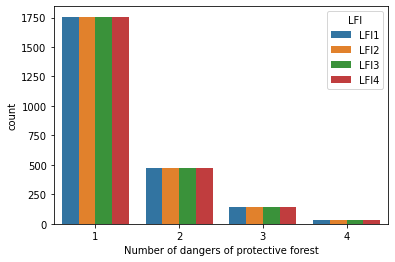

In [7]:
## Code Process_Silva : si la forêt protège contre un ou plusieurs dangers naturels
# -1 pas d'indication
# 0	 pas de danger naturel
# 1	 un danger naturel
# 2	 deux danger naturels
# 3	 trois danger naturels
# 4	 quatre danger naturels

pc = sns.countplot(x="PROCESS_SILVA", data=parcelle, hue="LFI", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"])
pc.set(xlabel='Number of dangers of protective forest')
plt.show()

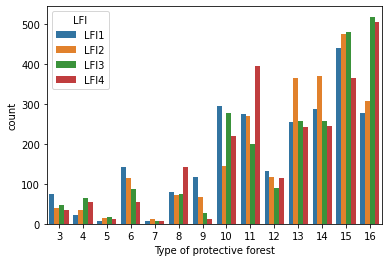

In [8]:
## Type of forest
# -1 Valeur non déterminée
# 1 forêt inaccessible
# 2 forêt buissonnante
# 3 surface forestière non boisée en permanence
# 4 surface forestière temporairement non boisée
# 5 routes et talus
# 6 boisement permanent
# 7 selves et plantations
# 8 Taillis sous futaie
# 9 Taillis sous futaie
# 10 Haute futaie jardinée
# 11 futaie irrégulière
# 12 Jeunes peuplements/épaississement
# 13 perchis
# 14 bois d'œuvre faible
# 15 bois d'œuvre moyen
# 16 bois d'œuvre fort
# 17 relevé incomplet

pt = sns.countplot(x="TYPE_FORET305", data=parcelle, hue="LFI", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"])
pt.set(xlabel='Type of protective forest')
plt.show()

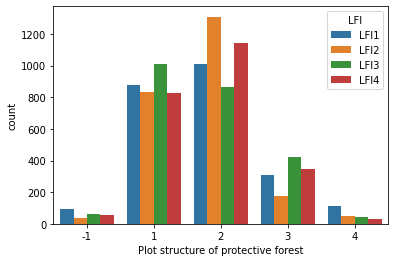

In [9]:
## Structure peuplement
# -1 Valeur non déterminée
# 1 monocouche
# 2 multi-strates régulier.
# 3 étagé
# 4 Structure en rotations

pt = sns.countplot(x="STR_PPL", data=parcelle, hue="LFI", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"])
pt.set(xlabel='Plot structure of protective forest')
plt.show()

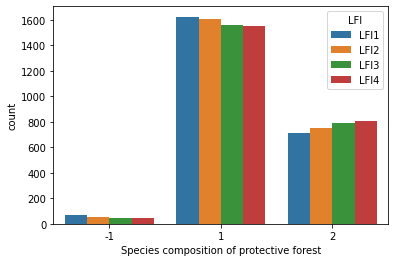

In [10]:
## catégorie espèce
# 1 : résineux
# 2 : feuillus

pt = sns.countplot(x="FEU_RES", data=parcelle, hue="LFI", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"])
pt.set(xlabel='Species composition of protective forest')
plt.show()

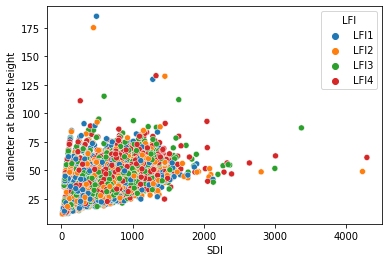

In [11]:
## Stand Density Index
pt = sns.scatterplot(x="SDI", y="DDOM", data=parcelle, hue="LFI", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"])
pt.set(xlabel='SDI', ylabel="diameter at breast height")
plt.show()

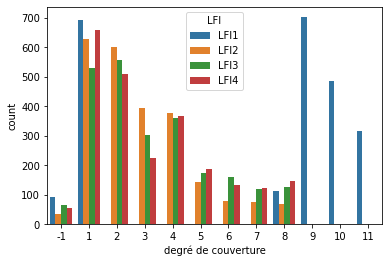

In [12]:
## degré de recouvrement
# -1	pas d'indication
# 1	comprimé
# 2	normal
# 3	lâche
# 4	aéré
# 5	clairièré
# 6	en collectifs serrés
# 7	en collectifs normaux
# 8	fermeture étagée
# 9	normal à lâche					
# 10	aéré à clairièré				
# 11	en collectifs

pt = sns.countplot(x="DEG_FERMETURE", data=parcelle, hue="LFI", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"])
pt.set(xlabel='degré de couverture')
plt.show()

In [ ]:

# -1 : pas d'indication
# 1	: 0 à 20%
# 2	: 21 à 40%
# 3	: 41 à 60%
# 4	: 61 à 80%
# 5	: plus de 80%

In [ ]:
## Surface trouée
# -1	absence de valeur
# 1	pas de trouée (< 100 m2)
# 2	petite trouée (100 à 500 m2)
# 3	trouée moyenne (500 à 1'000 m2)
# 4	grande trouée (1'000 à 5'000 m2)
# 5	très grande trouée (>5'000 m2)

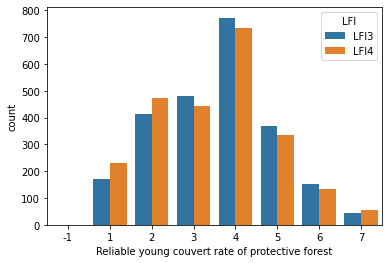

In [13]:
# Taux de couverture assuré par la régénération
# -1 : Valeur non déterminée
# 1 : <1%
# 2 : 1 à 4% de couverture
# 3 : 5 à 9% de couverture
# 4 : 10 à 25%
# 5 : 26 jusqu'à 50%
# 6 : 51 jusqu'à 75%
# 7 : 76 jusqu'à 100%

pt = sns.countplot(x="TAUX_COUV_RAJ_ASS", data=parcelle, hue="LFI", hue_order=["LFI3", "LFI4"])
pt.set(xlabel='Reliable young couvert rate of protective forest')
plt.show()

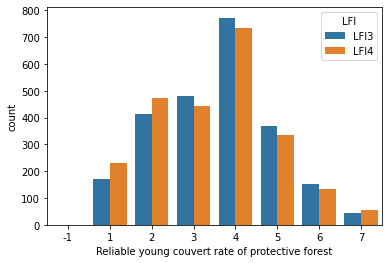

In [11]:
# Taux de couverture assuré par la régénération
# -1 : Valeur non déterminée
# 1 : <1%
# 2 : 1 à 4% de couverture
# 3 : 5 à 9% de couverture
# 4 : 10 à 25%
# 5 : 26 jusqu'à 50%
# 6 : 51 jusqu'à 75%
# 7 : 76 jusqu'à 100%

pt = sns.countplot(x="TAUX_COUV_RAJ_ASS", data=parcelle, hue="LFI", hue_order=["LFI3", "LFI4"])
pt.set(xlabel='Reliable young couvert rate of protective forest')
plt.show()

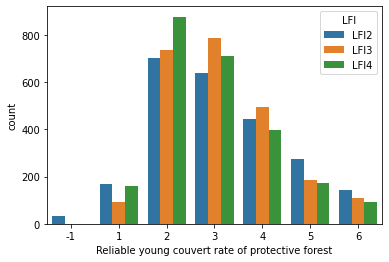

In [12]:
# Taux de couverture de la régénération
# -1 : Valeur non déterminée
# 1 : <1%
# 2 : 1 à 4% de couverture
# 3 : 5 à 9% de couverture
# 4 : 10 à 25%
# 5 : 26 jusqu'à 50%
# 6 : 51 jusqu'à 75%
# 7 : 76 jusqu'à 100%

pt = sns.countplot(x="TAUX_COUV_RAJ", data=parcelle, hue="LFI", hue_order=["LFI2","LFI3", "LFI4"])
pt.set(xlabel='Reliable young couvert rate of protective forest')
plt.show()

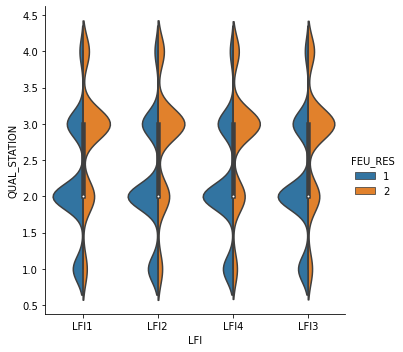

In [14]:
sns.catplot(data=parcelle, x="LFI", y="QUAL_STATION", hue="FEU_RES", hue_order= [1, 2], kind="violin", split=True);

### 1.2 Forest growth

- Surface terriere

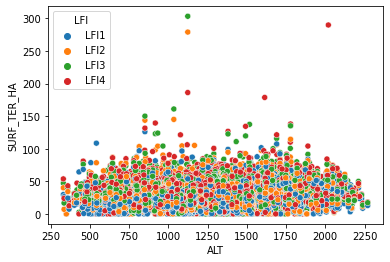

In [15]:
sns.scatterplot(data=parcelle, x="ALT", y="SURF_TER_HA", hue="LFI", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"]);

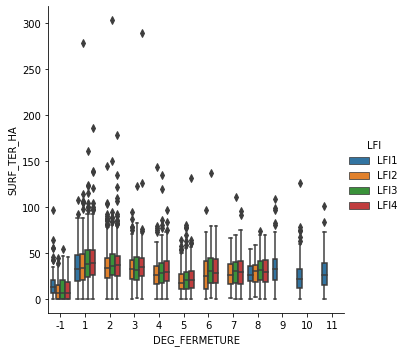

In [16]:
sns.catplot(data=parcelle, x="DEG_FERMETURE", y="SURF_TER_HA", hue="LFI", kind="box", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"]);

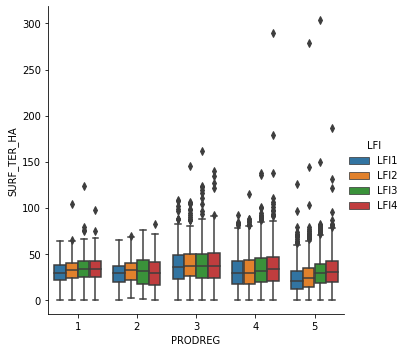

In [17]:
sns.catplot(data=parcelle, x="PRODREG", y="SURF_TER_HA", hue="LFI", kind="box", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"]);

- Performance croissance

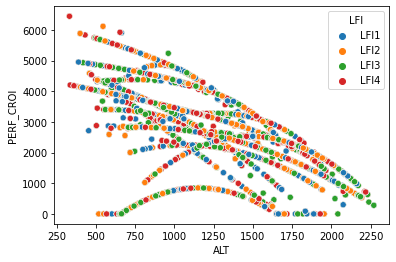

In [18]:
sns.scatterplot(data=parcelle, x="ALT", y="PERF_CROI", hue="LFI", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"]);

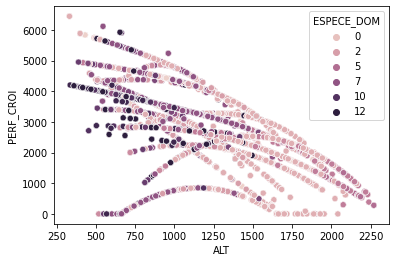

In [19]:
sns.scatterplot(data=parcelle, x="ALT", y="PERF_CROI", hue="ESPECE_DOM");

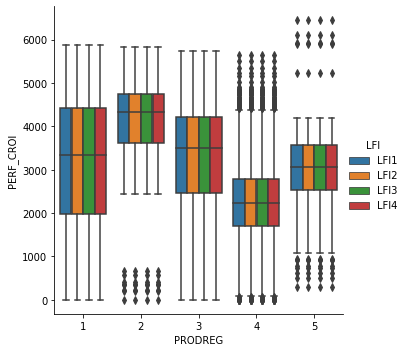

In [20]:
sns.catplot(data=parcelle, x="PRODREG", y="PERF_CROI", hue="LFI", kind="box", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"]);

### 1.3 Correlation matrix

<AxesSubplot:>

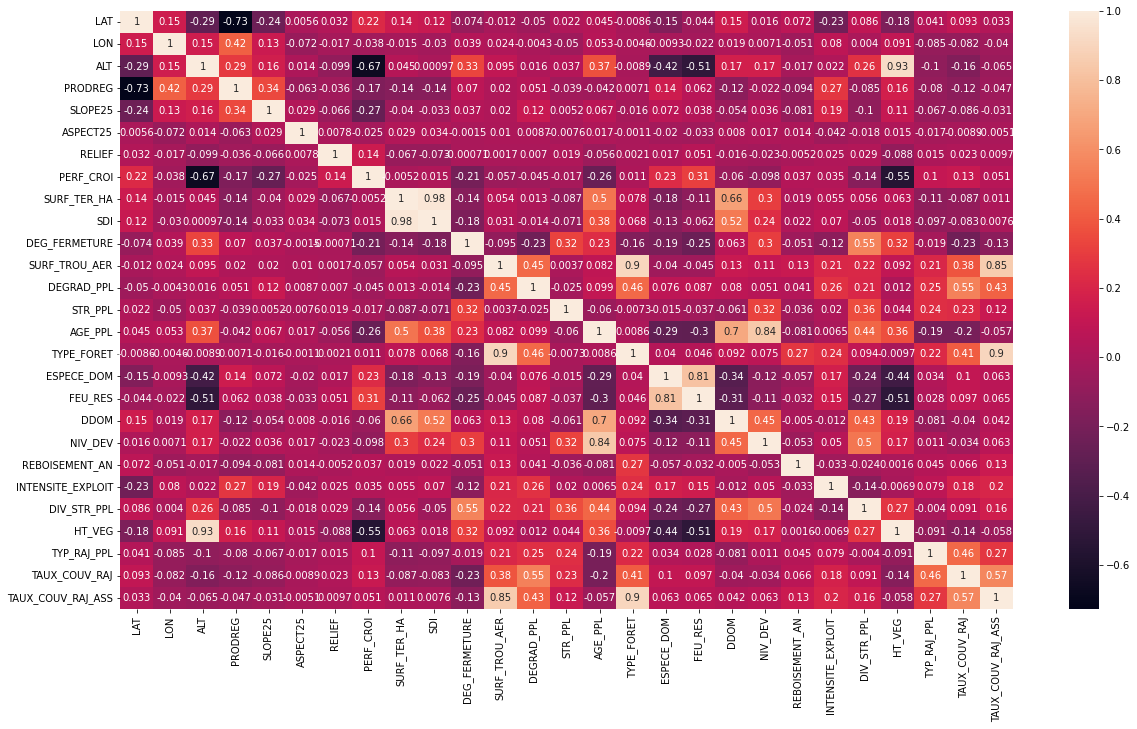

In [21]:
var_to_test = ["LFI", "LAT", "LON", "ALT", "PRODREG", "SLOPE25", "ASPECT25", "RELIEF",
                "PERF_CROI", "SURF_TER_HA", "SDI", "DEG_FERMETURE", "SURF_TROU_AER", "DEGRAD_PPL",
                "STR_PPL", "AGE_PPL", "TYPE_FORET", "ESPECE_DOM", "FEU_RES", "DDOM", "NIV_DEV",
                "REBOISEMENT_AN", "INTENSITE_EXPLOIT", "DIV_STR_PPL", "HT_VEG",
                "TYP_RAJ_PPL", "TAUX_COUV_RAJ", "TAUX_COUV_RAJ_ASS"]

corr = parcelle[var_to_test].corr(method = 'spearman')
f, ax = plt.subplots(figsize=(20, 11))
sns.heatmap(corr, annot=True, ax=ax, fmt='.2g')

1.4 Cartes

In [22]:
fig = px.scatter_mapbox(parcelle, lat="LAT", lon="LON", color="LFI", size="SURF_TER_HA", zoom=6, mapbox_style="carto-positron")
fig.show()

In [23]:
parcelle["DEG_FERMETURE_pos"] = parcelle["DEG_FERMETURE"].apply(lambda x: x if x >= 0
else 0) 

fig = px.scatter_mapbox(parcelle, lat="LAT", lon="LON", color="LFI", size="DEG_FERMETURE_pos", zoom=6, mapbox_style="carto-positron")
fig.show()

In [24]:
fig = px.scatter_mapbox(parcelle, lat="LAT", lon="LON", color="LFI", size="PERF_CROI", zoom=6, mapbox_style="carto-positron")
fig.show()

In [25]:
parcelle["TAUX_COUV_RAJ_ASS_pos"] = parcelle["TAUX_COUV_RAJ_ASS"].apply(lambda x: x if x >= 0
else 0) 

fig = px.scatter_mapbox(parcelle, lat="LAT", lon="LON", color="LFI", size="TAUX_COUV_RAJ_ASS_pos", zoom=6, mapbox_style="carto-positron")
fig.show()